<a href="https://colab.research.google.com/github/sipocz/Zindi_plastic/blob/main/plastic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.0 which is incompatible.


In [2]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 3.9 MB/s eta 0:00:00


In [3]:
!pip install lazypredict

In [4]:
import ee
import geemap
import PIL
import pandas
from google.colab import drive
import lazypredict




In [5]:
import sklearn

In [6]:
_DEBUG_=False
_PROJECT_BASE_='/content/drive/MyDrive/Zindi_Plastic_images/'
_IMAGES_='images'
_TEST_IMAGES_='test_images'

_ORIG_='orig'


In [7]:

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:

df_kenya=pandas.read_csv(_PROJECT_BASE_+_ORIG_+"/Kenya_training.csv")


In [9]:
df_kenya.head()

,ID,lon,lat,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,TARGET
0,1,37.059054,0.046039,2731.0,3035.0,5418.0,5306.5,2958.0,4610.5,5099.5,2994.0,4108.5,3187.5,-6.861458,-12.162713,1
1,2,37.059503,0.047296,2921.0,3329.0,5834.0,6472.0,4144.5,5782.0,6302.0,3344.0,5269.0,4471.5,-8.082717,-14.619608,1
2,3,37.057527,0.047656,3828.0,4163.0,6420.0,7890.5,5408.5,6695.5,7302.0,4380.0,6905.0,6905.5,-7.767043,-14.880353,1
3,4,37.057976,0.047925,2556.0,2839.0,4822.0,5276.5,3201.0,4643.0,5069.5,2787.0,3832.0,2867.5,-7.773118,-15.587653,1
4,5,37.056359,0.048554,3790.0,4009.0,6476.0,6199.5,4285.0,5711.0,6079.5,3939.0,4892.5,3702.5,-6.104467,-15.431915,1


In [10]:
df_spain=pandas.read_csv(_PROJECT_BASE_+_ORIG_+"/Spain_training.csv")


In [11]:
df_vnm=pandas.read_csv(_PROJECT_BASE_+_ORIG_+"/VNM_training.csv")


In [12]:
df_vnm["lon"]=df_vnm["Lon"]
df_vnm["lat"]=df_vnm["Lat"]

del(df_vnm['Lon'])
del(df_vnm['Lat'])


In [13]:
df_all=pandas.concat([df_kenya,df_spain,df_vnm])

In [14]:
del(df_all["ID"])
del(df_all["lon"])
del(df_all["lat"])


In [15]:
df_all.columns

Index(['blue_p50', 'green_p50', 'nir_p50', 'nira_p50', 're1_p50', 're2_p50',
       're3_p50', 'red_p50', 'swir1_p50', 'swir2_p50', 'VV_p50', 'VH_p50',
       'TARGET'],
      dtype='object')

In [16]:
X_cols=['blue_p50', 'green_p50', 'nir_p50', 'nira_p50', 're1_p50', 're2_p50',
       're3_p50', 'red_p50', 'swir1_p50', 'swir2_p50', 'VV_p50', 'VH_p50']

y_cols=['TARGET']

In [17]:
X=df_all[X_cols]
y=df_all[y_cols]
relevant=df_all[X_cols+y_cols]

In [18]:
relevant.head()

,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,TARGET
0,2731.0,3035.0,5418.0,5306.5,2958.0,4610.5,5099.5,2994.0,4108.5,3187.5,-6.861458,-12.162713,1
1,2921.0,3329.0,5834.0,6472.0,4144.5,5782.0,6302.0,3344.0,5269.0,4471.5,-8.082717,-14.619608,1
2,3828.0,4163.0,6420.0,7890.5,5408.5,6695.5,7302.0,4380.0,6905.0,6905.5,-7.767043,-14.880353,1
3,2556.0,2839.0,4822.0,5276.5,3201.0,4643.0,5069.5,2787.0,3832.0,2867.5,-7.773118,-15.587653,1
4,3790.0,4009.0,6476.0,6199.5,4285.0,5711.0,6079.5,3939.0,4892.5,3702.5,-6.104467,-15.431915,1


In [19]:
# prompt: A következő adatkeret használata: df_all: correlation

# Calculate the correlation matrix
correlation_matrix = relevant.corr()

# Display the correlation matrix
correlation_matrix

,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,TARGET
blue_p50,1.000000,0.986399,0.675725,0.628098,0.916109,0.767698,0.671453,0.932788,0.602660,0.532467,0.093239,0.084192,-0.457852
green_p50,0.986399,1.000000,0.707829,0.654013,0.957072,0.798627,0.696330,0.968304,0.674922,0.601245,0.057231,0.043597,-0.392389
nir_p50,0.675725,0.707829,1.000000,0.973776,0.707700,0.965459,0.977632,0.629939,0.527379,0.327466,-0.051420,-0.016141,-0.366264
nira_p50,0.628098,0.654013,0.973776,1.000000,0.664417,0.965628,0.992316,0.567068,0.508767,0.297421,-0.055998,-0.022255,-0.370324
re1_p50,0.916109,0.957072,0.707700,0.664417,1.000000,0.812335,0.701457,0.976102,0.790741,0.710574,0.011761,-0.022852,-0.281953
re2_p50,0.767698,0.798627,0.965459,0.965628,0.812335,1.000000,0.981530,0.731275,0.589683,0.406090,-0.040412,-0.020718,-0.390268
re3_p50,0.671453,0.696330,0.977632,0.992316,0.701457,0.981530,1.000000,0.609662,0.501780,0.299334,-0.045805,-0.015446,-0.402947
red_p50,0.932788,0.968304,0.629939,0.567068,0.976102,0.731275,0.609662,1.000000,0.765531,0.716351,0.033934,-0.005644,-0.271764
swir1_p50,0.602660,0.674922,0.527379,0.508767,0.790741,0.589683,0.501780,0.765531,1.000000,0.932634,0.003207,-0.083247,0.044187
swir2_p50,0.532467,0.601245,0.327466,0.297421,0.710574,0.406090,0.299334,0.716351,0.932634,1.000000,0.111331,-0.001299,0.174571


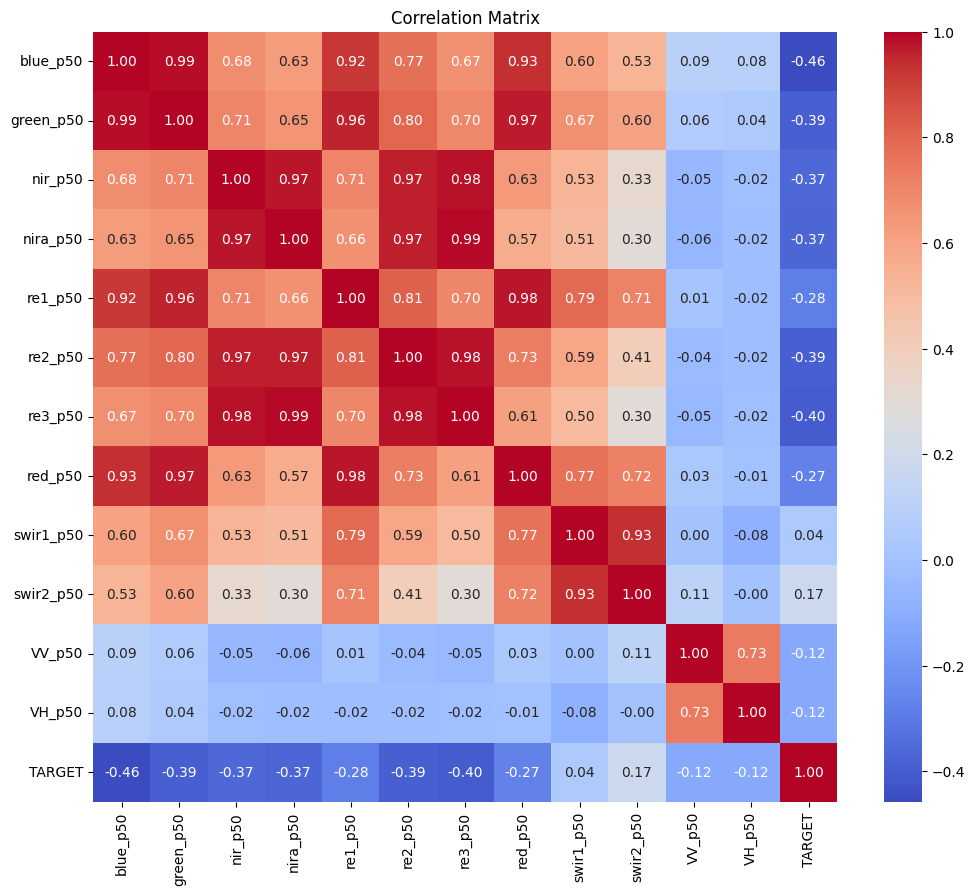

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = relevant.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [21]:
!pip show lazypredict

Name: lazypredict
Version: 0.2.12
Summary: Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning
Home-page: https://github.com/shankarpandala/lazypredict
Author: Shankar Rao Pandala
Author-email: shankar.pandala@live.com
License: MIT license
Location: /usr/local/lib/python3.10/dist-packages
Requires: click, joblib, lightgbm, pandas, scikit-learn, tqdm, xgboost
Required-by: 


In [22]:
from lazypredict.Supervised import LazyClassifier


In [23]:
lp=LazyClassifier()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# prompt: A következő adatkeret használata: df_all: correlation

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
correlation_matrix

,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50
blue_p50,1.00,0.99,0.68,0.63,0.92,0.77,0.67,0.93,0.60,0.53,0.09,0.08
green_p50,0.99,1.00,0.71,0.65,0.96,0.80,0.70,0.97,0.67,0.60,0.06,0.04
nir_p50,0.68,0.71,1.00,0.97,0.71,0.97,0.98,0.63,0.53,0.33,-0.05,-0.02
nira_p50,0.63,0.65,0.97,1.00,0.66,0.97,0.99,0.57,0.51,0.30,-0.06,-0.02
re1_p50,0.92,0.96,0.71,0.66,1.00,0.81,0.70,0.98,0.79,0.71,0.01,-0.02
re2_p50,0.77,0.80,0.97,0.97,0.81,1.00,0.98,0.73,0.59,0.41,-0.04,-0.02
re3_p50,0.67,0.70,0.98,0.99,0.70,0.98,1.00,0.61,0.50,0.30,-0.05,-0.02
red_p50,0.93,0.97,0.63,0.57,0.98,0.73,0.61,1.00,0.77,0.72,0.03,-0.01
swir1_p50,0.60,0.67,0.53,0.51,0.79,0.59,0.50,0.77,1.00,0.93,0.00,-0.08
swir2_p50,0.53,0.60,0.33,0.30,0.71,0.41,0.30,0.72,0.93,1.00,0.11,-0.00


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.05, random_state=42)

In [27]:
lp.fit(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,)

 90%|████████▉ | 26/29 [00:10<00:00,  3.13it/s]

[LightGBM] [Info] Number of positive: 1407, number of negative: 1276
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 2683, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524413 -> initscore=0.097730
[LightGBM] [Info] Start training from score 0.097730


100%|██████████| 29/29 [00:10<00:00,  2.64it/s]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LGBMClassifier                     0.95               0.95     0.95      0.95   
 RandomForestClassifier             0.94               0.94     0.94      0.94   
 LabelSpreading                     0.93               0.93     0.93      0.93   
 LabelPropagation                   0.93               0.93     0.93      0.93   
 BaggingClassifier                  0.93               0.93     0.93      0.93   
 ExtraTreesClassifier               0.93               0.93     0.93      0.93   
 SVC                                0.92               0.92     0.92      0.92   
 AdaBoostClassifier                 0.92               0.92     0.92      0.92   
 CalibratedClassifierCV             0.92               0.91     0.91      0.92   
 LinearSVC                          0.92               0.91     0.91      0.92   
 QuadraticDiscri

In [1]:
from sklearn.svm import SVC

In [29]:
svc=SVC()
po=svc.fit(X_train,y_train)

In [30]:
!pip install lightgbm

In [31]:
import lightgbm
print (lightgbm.__version__)

4.5.0


In [32]:
from lightgbm import LGBMClassifier

In [33]:
lgbm_model=LGBMClassifier( )

In [34]:
lgbm_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1407, number of negative: 1276
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 2683, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524413 -> initscore=0.097730
[LightGBM] [Info] Start training from score 0.097730


LGBMClassifier()

In [35]:
lgbm_model.predict(X_train)

array([2, 2, 2, ..., 2, 1, 2])

In [36]:
lgbm_model.score(X_test,y_test)

0.9225352112676056

In [37]:
lgbm_model.score(X,y)

0.9961061946902655

In [38]:
import pandas as pd

In [39]:
df_kenya_test=pd.read_csv(_PROJECT_BASE_+_ORIG_+"/Kenya_testing.csv")
df_kenya_test["attr"]="Kenya"
df_kenya_test["attr_id"]=df_kenya_test["attr"]+"_"+(df_kenya_test["ID"].map(str))
del(df_kenya_test["attr"])

In [40]:
df_kenya_test.head()

,ID,lon,lat,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,attr_id
0,1,37.06,0.05,3073.00,3293.00,5842.00,6076.00,3836.00,5433.00,5912.50,3206.00,4732.00,3782.00,-7.11,-13.26,Kenya_1
1,2,37.06,0.05,3918.00,4320.00,6582.00,7182.00,5275.00,6508.50,6977.50,4532.00,6498.00,6260.00,-8.05,-15.53,Kenya_2
2,3,37.06,0.05,3179.00,3541.00,6358.00,6588.50,4133.00,5749.50,6286.50,3555.00,5385.00,4731.00,-8.87,-15.36,Kenya_3
3,4,37.06,0.05,3549.00,3760.00,6304.00,6404.00,4467.50,5860.00,6347.50,3774.00,4779.50,3637.00,-5.62,-15.72,Kenya_4
4,5,37.06,0.05,2366.00,2636.00,4810.00,5191.50,3017.00,4526.00,4964.50,2554.00,3531.00,2445.50,-7.32,-14.48,Kenya_5


In [41]:
df_spain_test=pd.read_csv(_PROJECT_BASE_+_ORIG_+"/Spain_validation.csv")

df_spain_test["attr"]="Spain"
df_spain_test["attr_id"]=df_spain_test["attr"]+"_"+(df_spain_test["ID"].map(str))


del(df_spain_test["attr"])
df_spain_test.head()

,ID,lon,lat,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,attr_id
0,1,-3.57,36.80,5062.00,5162.00,6086.00,5923.00,5357.50,5764.00,5942.50,5202.00,4525.00,3652.50,-6.85,-11.05,Spain_1
1,2,-3.20,36.79,2829.00,3320.00,4007.00,4399.50,4393.00,4366.00,4389.00,3687.00,4112.00,3281.00,-8.28,-15.78,Spain_2
2,3,-2.42,36.83,4940.00,5110.00,5510.00,5511.50,5544.50,5526.50,5565.50,5258.00,4971.00,4384.50,-9.15,-15.16,Spain_3
3,4,-2.41,36.85,5124.00,5292.00,5740.00,5635.00,5685.00,5709.00,5776.00,5392.00,4787.00,4020.00,-6.16,-11.83,Spain_4
4,5,-2.42,36.86,6442.00,6508.00,6848.00,6528.50,6801.00,6765.00,6668.00,6698.00,5869.00,5312.50,-6.10,-14.60,Spain_5


In [42]:
df_vnm_test=pd.read_csv(_PROJECT_BASE_+_ORIG_+"/VNM_testing.csv")

df_vnm_test["lon"]=df_vnm_test["Lon"]
df_vnm_test["lat"]=df_vnm_test["Lat"]

df_vnm_test["attr"]="VNM"
df_vnm_test["attr_id"]=df_vnm_test["attr"]+"_"+(df_vnm_test["ID"].map(str))

del(df_vnm_test['Lon'])
del(df_vnm_test['Lat'])
del(df_vnm_test["attr"])
df_vnm_test.head()

,ID,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,lon,lat,attr_id
0,1,2284.00,2429.00,2857.00,3314.50,2690.50,3043.50,3165.00,2461.00,3385.50,2848.00,-9.69,-17.49,108.41,11.70,VNM_1
1,2,2606.00,2743.00,3708.00,4164.00,3226.50,3826.50,4080.50,2819.00,3978.50,3402.00,-8.68,-16.15,108.36,11.78,VNM_2
2,3,1965.00,2174.00,3713.00,3767.00,2475.50,3473.50,3750.50,2050.00,2870.50,2309.00,-7.79,-14.82,108.20,11.69,VNM_3
3,4,2010.00,2051.00,2401.00,2510.00,2234.00,2448.00,2532.00,2106.00,2476.50,2137.00,-9.49,-15.77,108.20,11.69,VNM_4
4,5,2084.00,2253.00,3148.00,3371.00,2628.00,3212.50,3369.00,2301.00,3226.00,2874.00,-7.75,-16.85,108.20,11.70,VNM_5


In [43]:
df_all_test=pandas.concat([df_kenya_test,df_spain_test,df_vnm_test])
df_all_test.head()

,ID,lon,lat,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,attr_id
0,1,37.06,0.05,3073.00,3293.00,5842.00,6076.00,3836.00,5433.00,5912.50,3206.00,4732.00,3782.00,-7.11,-13.26,Kenya_1
1,2,37.06,0.05,3918.00,4320.00,6582.00,7182.00,5275.00,6508.50,6977.50,4532.00,6498.00,6260.00,-8.05,-15.53,Kenya_2
2,3,37.06,0.05,3179.00,3541.00,6358.00,6588.50,4133.00,5749.50,6286.50,3555.00,5385.00,4731.00,-8.87,-15.36,Kenya_3
3,4,37.06,0.05,3549.00,3760.00,6304.00,6404.00,4467.50,5860.00,6347.50,3774.00,4779.50,3637.00,-5.62,-15.72,Kenya_4
4,5,37.06,0.05,2366.00,2636.00,4810.00,5191.50,3017.00,4526.00,4964.50,2554.00,3531.00,2445.50,-7.32,-14.48,Kenya_5


In [44]:

X_cols_test=['blue_p50', 'green_p50', 'nir_p50', 'nira_p50', 're1_p50', 're2_p50',
       're3_p50', 'red_p50', 'swir1_p50', 'swir2_p50', 'VV_p50', 'VH_p50']

X_test_df=df_all_test[X_cols]

In [45]:
prediction=lgbm_model.predict(X_test_df)

In [46]:
df_all_test["TARGET"]=prediction

In [47]:
df_all_test.tail()


,ID,lon,lat,blue_p50,green_p50,nir_p50,nira_p50,re1_p50,re2_p50,re3_p50,red_p50,swir1_p50,swir2_p50,VV_p50,VH_p50,attr_id,TARGET
974,975,108.30,11.46,1861.50,2198.00,4177.50,5029.00,2948.50,4060.50,4535.00,2323.00,4273.50,2949.50,-6.05,-12.25,VNM_975,2
975,976,108.32,11.47,1650.00,1752.50,3161.50,3704.50,2277.50,3172.50,3473.00,1710.00,2980.50,2256.00,-5.91,-12.14,VNM_976,2
976,977,108.31,11.48,2010.50,2191.00,3378.00,3908.00,2742.00,3376.50,3624.50,2246.00,3460.00,2773.00,-7.45,-13.04,VNM_977,1
977,978,108.32,11.48,1726.00,2102.00,4040.00,4197.00,2595.50,3487.50,3797.50,2216.00,3968.00,2945.00,-8.65,-13.36,VNM_978,2
978,979,108.32,11.49,1643.50,1834.50,3573.00,3326.00,2192.00,2941.00,3188.00,1654.00,2647.00,1961.50,-7.83,-14.57,VNM_979,2


In [48]:
df_all_test.sort_values(by=["attr_id"],inplace=True)

In [49]:
df_out=df_all_test[["attr_id","TARGET"]]
df_out = df_out.rename(columns={'attr_id': 'ID'})

In [50]:
df_out

,ID,TARGET
0,Kenya_1,1
9,Kenya_10,1
99,Kenya_100,1
999,Kenya_1000,2
1000,Kenya_1001,2
...,...,...
976,VNM_977,1
977,VNM_978,2
978,VNM_979,2
97,VNM_98,1


In [51]:
df_out.head()

,ID,TARGET
0,Kenya_1,1
9,Kenya_10,1
99,Kenya_100,1
999,Kenya_1000,2
1000,Kenya_1001,2


In [52]:
df_out.to_csv("submission12.csv",index=False)